# <img align="left" style="width: 200px;" src="udea.edu.jpeg">



# Proyecto Final Procesamiento Digital de señales 

# Detección y corrección de errores en transmisiones de datos inalámbricos

## Presentado a : Jhon James Granada

## Procesamiento Digital de Señales


### David Alexander Sanchez Garcia
Cc:1044101936

### Universidad de Antioquia 2023-1

In [1]:
# librerias 
import numpy as np 
import matplotlib.pylab as plt 
import math 
import scipy.signal as signal
from pylab import *
import warnings; warnings.filterwarnings("ignore")


## 1. Introducción 

### En las transmisiones inalámbricas, las señales pueden sufrir diferentes tipos de errores debido a la interferencia del canal, el ruido, la atenuación, la dispersión y otros fenómenos. Para garantizar una transmisión confiable y precisa de los datos, es necesario utilizar técnicas de detección y corrección de errores.


### Los filtros FIR e IIR son técnicas comunes utilizadas en el procesamiento de señales para modificar o extraer información de una señal. En el contexto de las transmisiones inalámbricas, se utilizan para filtrar las señales recibidas y reducir el impacto de los errores de transmisión.


## 2. GENERACIÓN DE  SEÑALES 

### 2.1 ¿Qué sucede al generar dos señales senoidales sintéticas con diferentes frecuencias de muestreo y cómo se relaciona esto con el teorema de muestreo de Nyquist? Explique según las gráficas obtenidas.

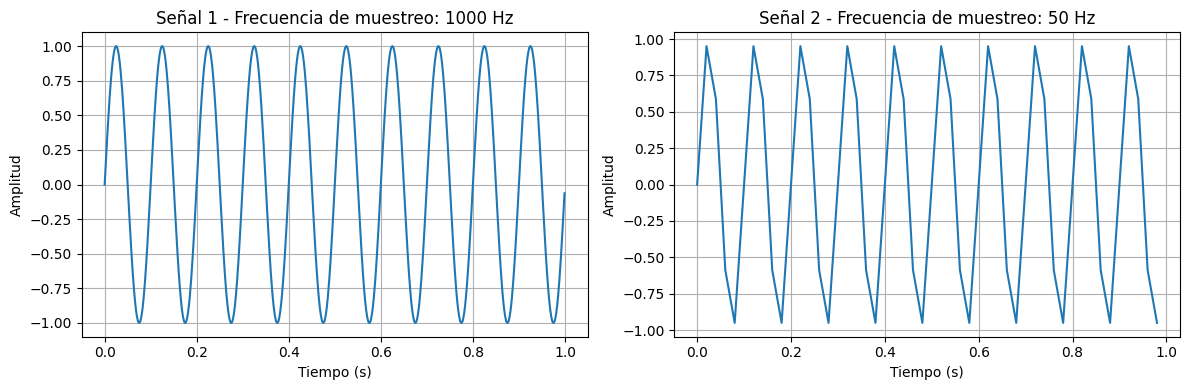

In [6]:
# Parámetros de la señal
amplitud = 1.0
frecuencia = 10.0  # Frecuencia de la señal en Hz

# Frecuencia de muestreo para la primera señal
fs1 = 1000 # Frecuencia de muestreo en Hz
tiempo1 = np.arange(0, 1, 1/fs1)
muestras1 = amplitud * np.sin(2 * np.pi * frecuencia * tiempo1)

# Frecuencia de muestreo para la segunda señal
fs2 = 50  # Frecuencia de muestreo en Hz
tiempo2 = np.arange(0, 1, 1/fs2)
muestras2 = amplitud * np.sin(2 * np.pi * frecuencia * tiempo2)

# Gráfico de las señales
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(tiempo1, muestras1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal 1 - Frecuencia de muestreo: {} Hz'.format(fs1))

plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(tiempo2, muestras2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal 2 - Frecuencia de muestreo: {} Hz'.format(fs2))
plt.grid(True)

plt.tight_layout()
plt.show()

### Explique segun las graficas?
#### La primera señal cumple con el teorema de muestreo de Nyquist porque la frecuencia de muestreo utilizada es al menos el doble de la frecuencia máxima presente en la señal, es decir, se cumple la condición de Nyquist.
#### la segunda señal no cumple con el teorema de Nyquist porque la frecuencia de muestreo utilizada es insuficiente.Como resultado, la señal muestreada muestra aliasing, es decir, se produce una distorsión en la forma de onda y se pierde información sobre la señal original. 
#### Podemos apreciar de forma intuitiva cómo el cumplimiento del teorema de muestreo de Nyquist es fundamental para el procesamiento de señales y la captura adecuada de la información contenida en una señal analógica continua.

### 2.2 Compare las dos señales senoidales sintéticas con diferentes frecuencias de muestreo en un solo gráfico y explique las diferencias observadas

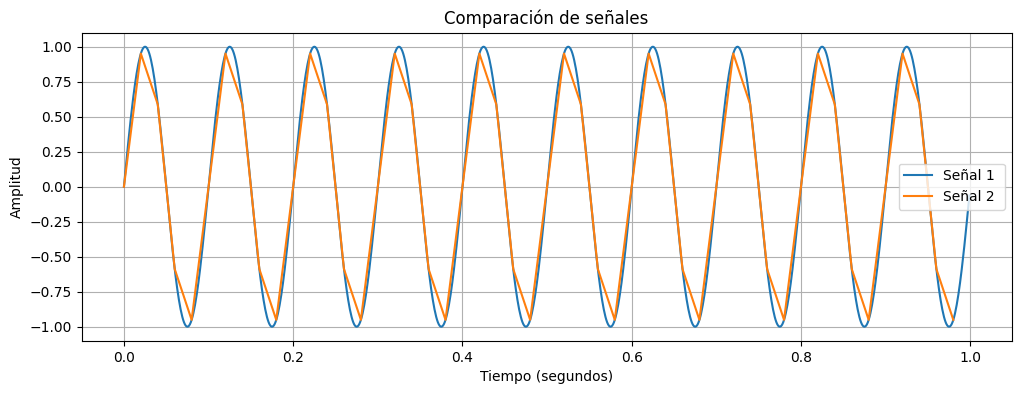

In [7]:
# Gráfico de las señales
tiempo = np.arange(0, 1, 1/fs1)
plt.figure(figsize=(12, 4))
plt.plot(tiempo1, muestras1, label='Señal 1 ')
plt.plot(tiempo2, muestras2, label='Señal 2 ')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.title('Comparación de señales')
plt.legend()
plt.grid(True)
plt.show()

### Al comparar la señales en una sola grafica se pueden notar mejor las diferencias que vemos en el item anterior, como lo es la frecuencia, la forma de onda de cada una, el aliasing para la señal 2, la amplitud y la relacion temporal. 

## 3. Generación de un canal de comunicación inalámbrico 

### 3.1 Al generar un canal inalámbrico con errores de transmisión controlados, como ruido, atenuación e interferencias, ¿qué observaciones se pueden hacer en relación a la calidad de la señal transmitida?

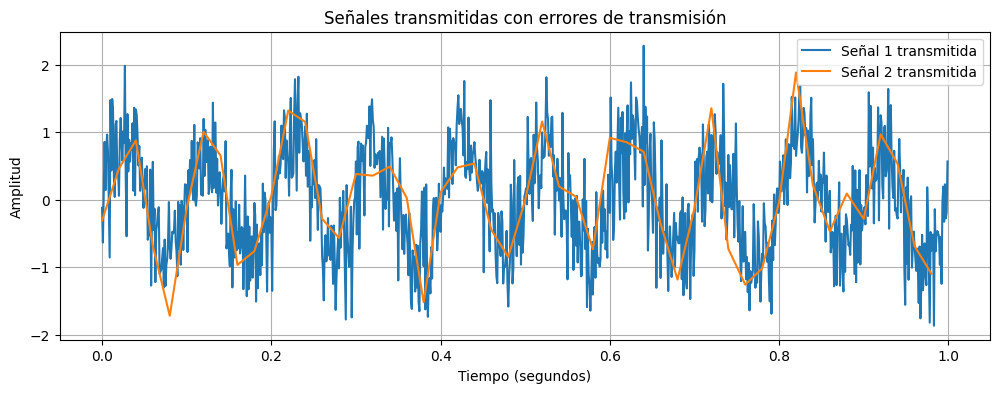

In [8]:
# Simulación del canal inalámbrico con errores de transmisión

#  El parámetro (0, 0.5) indica una distribución normal con media cero y desviación estándar de 0.1
canal_ruido1 = np.random.normal(0, 0.5, len(tiempo1))  # Agregar ruido gaussiano al canal
canal_ruido2 = np.random.normal(0, 0.5, len(tiempo2))  # Agregar ruido gaussiano al canal

# atenuación de 0.5, lo que simula una reducción de la amplitud de las señales
# debido a la propagación a través del canal inalámbrico.
atenuacion = 0.8  # Factor de atenuación del canal

interferencia1 = 0.2 * np.sin(2 * np.pi * 5 * tiempo1)  # Interferencia sinusoidal en el canal
interferencia2 = 0.2 * np.sin(2 * np.pi * 5 * tiempo2)  # Interferencia sinusoidal en el canal

# Esto simula la interferencia externa que puede ocurrir en las transmisiones inalámbricas.

señal1_transmitida = muestras1 * atenuacion + canal_ruido1 + interferencia1
señal2_transmitida = muestras2 * atenuacion + canal_ruido2 + interferencia2

# Gráfico de las señales transmitidas
plt.figure(figsize=(12, 4))
plt.plot(tiempo1, señal1_transmitida, label='Señal 1 transmitida')
plt.plot(tiempo2, señal2_transmitida, label='Señal 2 transmitida')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.title('Señales transmitidas con errores de transmisión')
plt.legend()
plt.grid(True)
plt.show()

### ¿Que se puede ver ?
####  Se observa que las señales transmitidas presentan distorsiones, variaciones en la amplitud y la presencia de ruido e interferencia.
#### Efectos de atenuación: La presencia de atenuación en el canal inalámbrico se puede visualizar comparando las amplitudes de las señales transmitidas con las señales originales.

#### Presencia de ruido: El ruido añadido al canal inalámbrico se puede identificar en la forma de oscilaciones aleatorias en las señales transmitidas. Estas oscilaciones pueden causar fluctuaciones en la amplitud de las señales y pueden afectar la claridad y la calidad de la transmisión.

#### Interferencia: La presencia de interferencia en el canal inalámbrico puede verse como componentes sinusoidales adicionales superpuestos a las señales transmitidas. Estas componentes sinusoidales pueden introducir distorsiones en la forma de onda y afectar la integridad de la señal recibida.

#### Se pueden identificar distorsiones, fluctuaciones en la amplitud y otros efectos no deseados que afectan la fidelidad de la señal original. Esto es especialmente relevante en aplicaciones donde la integridad de la señal es crítica, como la detección y corrección de errores en transmisiones de datos.



### 3.2 ¿Cómo se calcula y qué representa la relación señal-ruido (SNR) en una señal?

#### La relación señal-ruido (SNR, por sus siglas en inglés) es una medida que indica la relación entre la potencia de la señal deseada y la potencia del ruido presente en una señal. Para calcular la relación SNR, se puede utilizar la siguiente fórmula:

#### SNR = 10 * log10(P_señal / P_ruido)

#### Donde:

#### SNR es la relación señal-ruido en decibelios (dB).
#### P_señal es la potencia de la señal deseada.
#### P_ruido es la potencia del ruido presente en la señal.

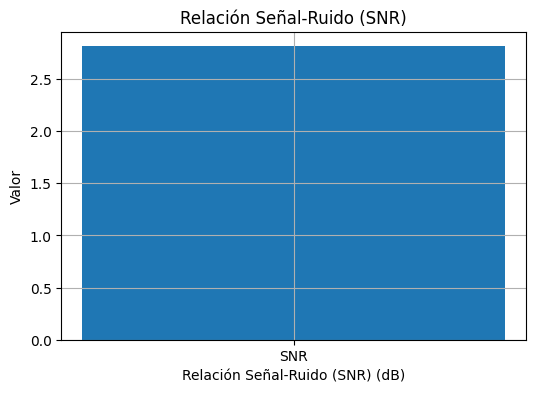

In [10]:

potencia_señal1 = np.mean(muestras1**2)  # Potencia de la señal original (componente senoidal)
potencia_señal2 = np.mean(muestras2**2)

# Calcular la potencia del ruido
ruido1 = señal1_transmitida - muestras1 * atenuacion
ruido2 = señal2_transmitida - muestras2 * atenuacion

potencia_ruido1 = np.mean(ruido1**2)
potencia_ruido2 = np.mean(ruido2**2)


snr1 = 10 * np.log10(potencia_señal1 / potencia_ruido1)
snr2 = 10 * np.log10(potencia_señal2 / potencia_ruido2)

# Gráfico de la relación señal-ruido
plt.figure(figsize=(6, 4))
plt.bar(["SNR"], [snr1])
plt.xlabel('Relación Señal-Ruido (SNR) (dB)')
plt.ylabel('Valor')
plt.title('Relación Señal-Ruido (SNR)')
plt.grid(True)
plt.show()



#### La relación señal-ruido nos indica la cantidad de señal útil en comparación con el nivel de ruido presente en la señal transmitida. Un valor de SNR más alto(mayor a 0) significa que la señal es más fuerte en relación con el ruido, lo que indica una mejor calidad de la transmisión. Por otro lado, un valor de SNR más bajo implica una mayor presencia de ruido en relación con la señal, lo que puede dificultar la detección y corrección de errores.

#### En el caso para el canal 1, un SNR de 2.656457153460989 dB indica que la potencia de la señal original es aproximadamente 2.92 veces mayor que la potencia del ruido presente en la señal transmitida. Esto indica una relación señal-ruido aceptable, pero aún puede haber presencia significativa de ruido en la señal. 
#### En el caso del canal 2, un SNR de 0.953708130461196 dB indica que la potencia de la señal original es ligeramente menor que la potencia del ruido presente en la señal transmitida. Esto sugiere que el nivel de ruido es mayor que el nivel de la señal, lo que puede afectar significativamente la calidad de la señal transmitida.
#### En pocas palabras se puede decir que la señal representada bien cumpliendo nyquist es mas fuerte que el ruido(atenuacion, interferencia ) y se puede detectar y corregir un poco mas facil los errores en la transmision. 

### 3.3 Al analizar las señales transmitidas en el dominio de la frecuencia, ¿qué observaciones destacan o qué patrones se pueden identificar?

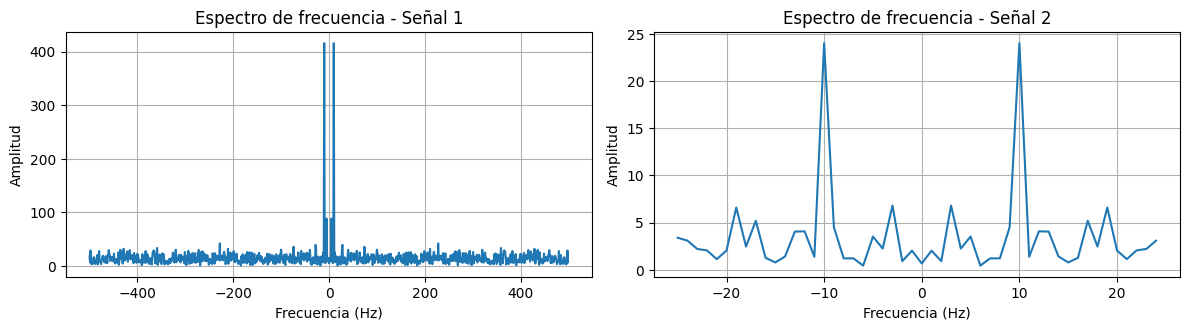

In [11]:
# Cálculo de la Transformada de Fourier
fft_señal1 = np.fft.fftshift(np.fft.fft(señal1_transmitida))
fft_señal2 = np.fft.fftshift(np.fft.fft(señal2_transmitida))

# Cálculo de las frecuencias correspondientes
frecuencias1 = np.fft.fftshift(np.fft.fftfreq(len(tiempo1), d=1/fs1))
frecuencias2 = np.fft.fftshift(np.fft.fftfreq(len(tiempo2), d=1/fs2))

# Gráfico del espectro de frecuencia
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(frecuencias1, np.abs(fft_señal1))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia - Señal 1')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(frecuencias2, np.abs(fft_señal2))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia - Señal 2')
plt.grid(True)

plt.tight_layout()
plt.show()


#### ¿Que puede notar?.
#### Se puede ver las frecuencias predominantes, que son las frecuencias de la señales originales,  se  ve las frecuenciales adicionales en los espectros,  esto podría indicar interferencias o distorsiones en la transmisión o adquisición de la señal, las cuales son causadas por el ruido, interferencia y atenuacion agregadas a las señales para simular como si estuvieran en un medio inalambrico. 
#### tenemos que los dos picos en el espectro de la señal 2 indican la presencia de dos componentes frecuenciales específicas en la señal, una con una frecuencia de -10 y otra con una frecuencia de 10. Estos picos nos brindan información sobre la composición espectral de la señal y pueden ser útiles para el análisis y procesamiento de la misma.
####  Se nota que no hay una parte constante o nivel de offset en las señales, y por lo tanto, en el espectro no se observa una componente en cero.
#### Estos componentes frecuenciales no deseados se pueden eliminar con la aplicacion de filtros. 

### 3.4 Aplicar una transformada diferente a la Transformada de Fourier para comparar los resultados obtenidos. ¿Qué características o diferencias se pueden observar en la nueva transformada en comparación con la Transformada de Fourier?

#### La Transformada de Ondaleta utiliza funciones matemáticas llamadas "ondas madre" o "ondas base" que son desplazadas y escaladas para analizar una señal en diferentes escalas de tiempo y frecuencia. Estas ondas madre son funciones con características específicas que se ajustan a diferentes patrones en una señal.

#### Cuando se aplica la Transformada de Ondaleta a una señal, se obtiene una representación en el dominio tiempo-frecuencia que muestra cómo las diferentes frecuencias varían a lo largo del tiempo. Esto permite analizar las características de la señal en diferentes escalas temporales y frecuenciales, lo cual es particularmente útil para señales no estacionarias, es decir, señales cuyas propiedades cambian con el tiempo.

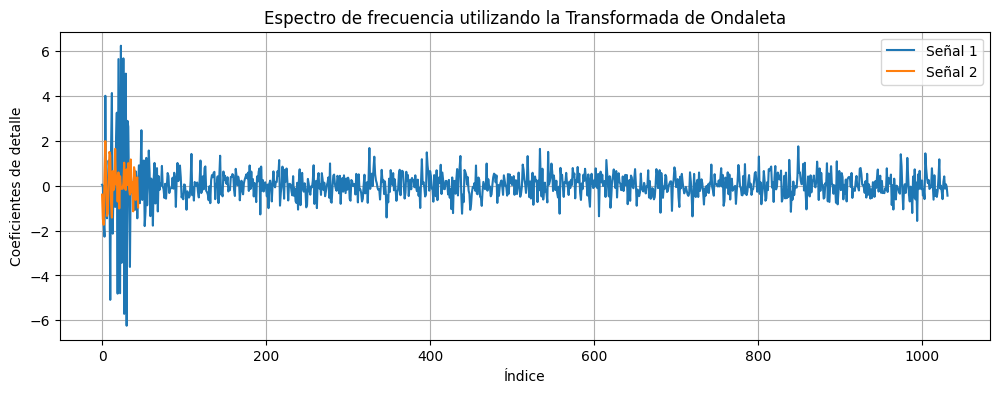

In [12]:
import pywt

# Aplicar la Transformada de Ondaleta
wavelet_señal1 = pywt.wavedec(señal1_transmitida, 'db4')
wavelet_señal2 = pywt.wavedec(señal2_transmitida, 'db4')

# Obtener los coeficientes de detalle y el coeficiente de aproximación
wavelet_coef_señal1 = np.concatenate(wavelet_señal1[1:])  # Unir los coeficientes de detalle
wavelet_coef_señal2 = np.concatenate(wavelet_señal2[1:])  # Unir los coeficientes de detalle

# Gráfico del espectro de frecuencia utilizando la Transformada de Ondaleta
plt.figure(figsize=(12, 4))
plt.plot(wavelet_coef_señal1, label='Señal 1')
plt.plot(wavelet_coef_señal2, label='Señal 2')
plt.xlabel('Índice')
plt.ylabel('Coeficientes de detalle')
plt.title('Espectro de frecuencia utilizando la Transformada de Ondaleta')
plt.legend()
plt.grid(True)
plt.show()

#### Esta transforma nos muestra  un análisis más detallado y preciso de las señales en el dominio tiempo-frecuencia en comparación con la Transformada de Fourier. En la Cual se puede ver  como el ruido esta afectando a ambas señales, donde la señal tiene los puntos de frecuencia mas altos todo con  una mayor cantidad de detalles y estructuras en diferentes escalas de tiempo y frecuencia. Y en la cual nos muestra que la mayor contribucion  es de la señal 1, debido a que esta esta mejor representada y tiene una relacion mayor a la del ruido, por lo cual es mas facil trabajar con esta . 
#### La Transformada de Ondaleta es especialmente útil para analizar señales transitorias o con características cambiantes en el tiempo. En el espectro de frecuencia obtenido con la Transformada de Ondaleta, puedes identificar diferentes componentes de frecuencia que están presentes en diferentes momentos de tiempo.

## 4. Aplicacion de Filtros FIIR e IIR

### 4.1 Diseñe un filtro FIR pasa-bajas con una banda de transición de 200 Hz, una frecuencia de corte de 300 Hz, Frecuencia de muestreo de 16khz y un ripple de 60 dB

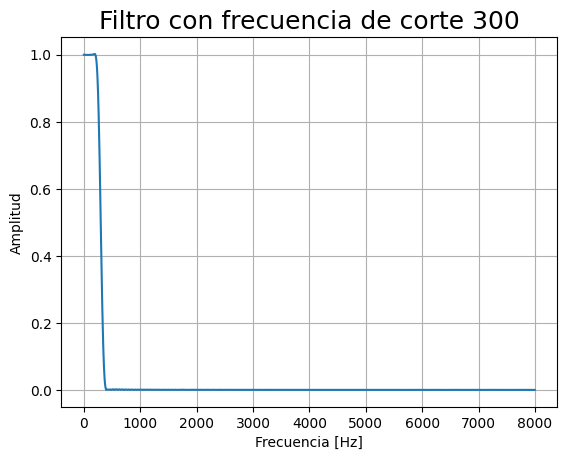

In [13]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
fs = 16000 # frec de muestreo
nyq_rate = fs / 2.0
roll_off = 200
cutoff_hz = 300
width = roll_off/nyq_rate
ripple_db = 60 #The desired attenuation in the stop band, in dB.
N,_= kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, pass_zero=True)
w, h = signal.freqz(taps, [1], worN=2000)
plt.plot(nyq_rate*w/np.pi, np.abs(h))

plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.title("Filtro con frecuencia de corte 300",fontsize = 18)
plt.grid()

### 4.2 Al pasar las señales por el filtro FIR diseñado, ¿qué se puede observar en términos de los cambios en las señales y cómo se ven afectadas por el filtro?

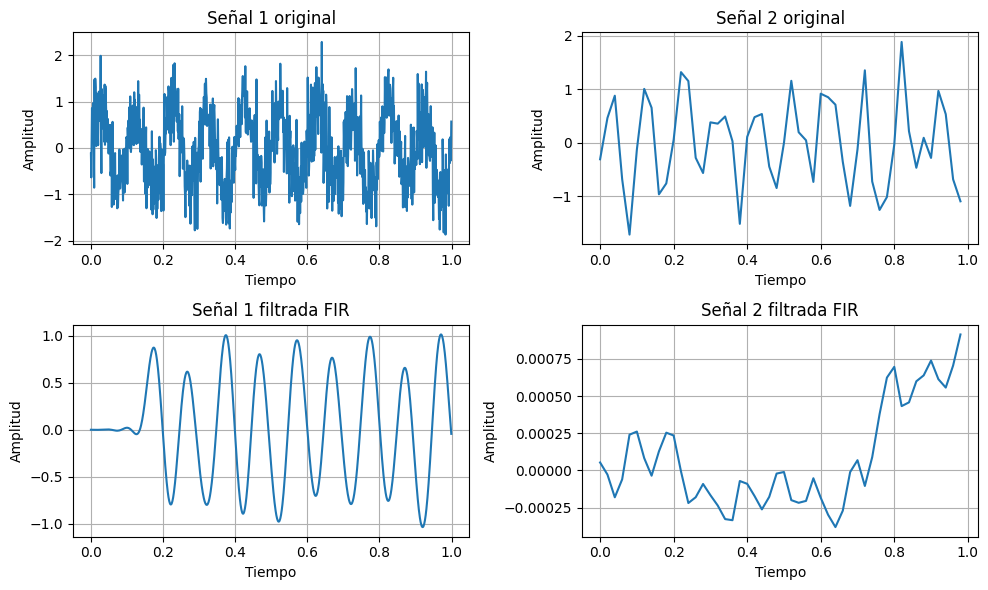

In [14]:
from scipy.signal import lfilter

# Aplicar filtro FIR a las señales
señal_filtrada1_fir= lfilter(taps, [1], señal1_transmitida)
señal_filtrada2_fir = lfilter(taps, [1], señal2_transmitida)

# Graficar las señales originales y filtradas
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(tiempo1, señal1_transmitida, label='Señal 1 original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 1 original')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(tiempo2, señal2_transmitida, label='Señal 2 original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 2 original')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(tiempo1, señal_filtrada1_fir, label='Señal 1 filtrada FIR ')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 1 filtrada FIR')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(tiempo2, señal_filtrada2_fir, label='Señal 2 filtrada FIR ')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 2 filtrada FIR')
plt.grid(True)

plt.tight_layout()
plt.show()

#### El filtro FIR pasa-bajas suprime las componentes de frecuencia por encima de la frecuencia de corte (300 Hz en este caso). Esto significa que las frecuencias más altas presentes en las señales se reducirán en amplitud o se eliminarán por completo.
#### Este filtro esta ayudando a reducir el ruido que  tenian las señales debido a altas frecuencias y esta mejorando la relación señal-ruido de las señales al eliminar componentes no deseadas de alta frecuencia.
#### Se puede ver un retardo en las señales debido a la aplicacion del filtro, por lo cual las señales tendran una distorsion en la forma de onda de la original, pero en cambio estamos ganando eliminar las frecuencias altas y preservando las bajas. 

#### Para la señal 2 se puede notar un cambio muy grande debido que la señal ya tiene muchos cambios desde el principio, por lo cual no se tiene como una forma clara de ella. 

#### 

### 4.3 Al realizar un filtro IIR de su elección, ¿cuáles son las diferencias y similitudes entre este filtro IIR y el filtro FIR previamente diseñado? ¿Cómo se comparan en términos de rendimiento, características de filtrado y efecto en las señales filtradas? 

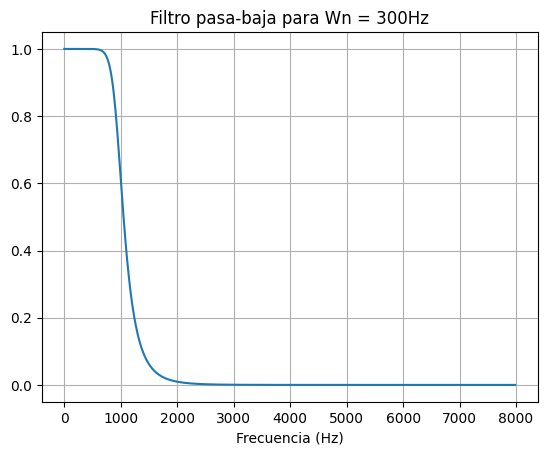

In [15]:
# Para el filtro pasa-bajas. Con frecuencia de corte de 300 Hz.

import scipy.signal as sp

Wn = 300/2500

b, a = sp.butter(6, Wn, btype='low', analog=False, output='ba', fs=None)
wb, Hb = sp.freqz(b, a);
plt.plot((wb*fs)/(2*np.pi), np.abs(Hb))
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.title('Filtro pasa-baja para Wn = 300Hz')
y_low = sp.lfilter(b, a, señal1_transmitida)

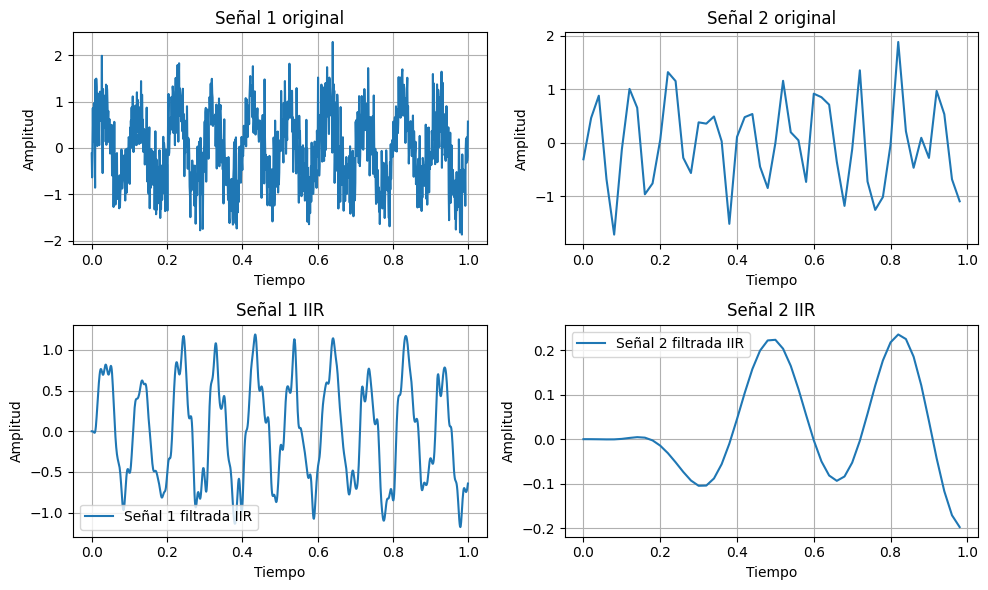

In [16]:
# Aplicar filtro IIR
señal_filtrada_iir1 = sp.lfilter(b, a, señal1_transmitida)
señal_filtrada_iir2 = sp.lfilter(b, a, señal2_transmitida)

# Gráfico de las señales originales y las señales filtradas
plt.figure(figsize=(10, 6))


plt.subplot(2, 2, 1)
plt.plot(tiempo1, señal1_transmitida, label='Señal 1 original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 1 original')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(tiempo2, señal2_transmitida, label='Señal 2 original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 2 original')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(tiempo1, señal_filtrada_iir1, label='Señal 1 filtrada IIR')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 1 IIR')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(tiempo2, señal_filtrada_iir2, label='Señal 2 filtrada IIR')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 2 IIR')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

####  El filtro IIR reduce la amplitud de las componentes de alta frecuencia presentes en las señales original. Esto se traduce en una disminución de la energía de las frecuencias más altas en comparación con las frecuencias más bajas. Este filtro IIR  introducen un retardo en el tiempo debido a la retroalimentación entre las etapas del filtro. Este retardo puede afectar la alineación temporal entre las señales originales y las señales filtradas.
#### los filtros FIR son de fase lineal( Como lo vimos en la teoria estos filtros son de fase lineal, con lo que representar una parte de ellos( La mitad ) podemos representar la otra  y no introducen retrasos en el tiempo. Esto puede contribuir a una mejor representación temporal de las señales filtradas por un filtro FIR.
#### En estas graficas de puede notar que los filtros Fir al tener una fase lineal y para este caso estan haciendo un gran trabajo, ya que la señal le esta eliminando muchas componentes de altas frecuencias, en cambio para el iir no se estan filtrando tantas como lo vemos en la graficas. 

### 4.3 Al mostrar las señales después de aplicar el filtro en el dominio de la frecuencia, ¿qué información se puede obtener y qué revela sobre el efecto del filtro en las características espectrales de las señales? Explique cómo se ven afectadas las señales en términos de amplitud y distribución de frecuencias después de pasar por el filtro.

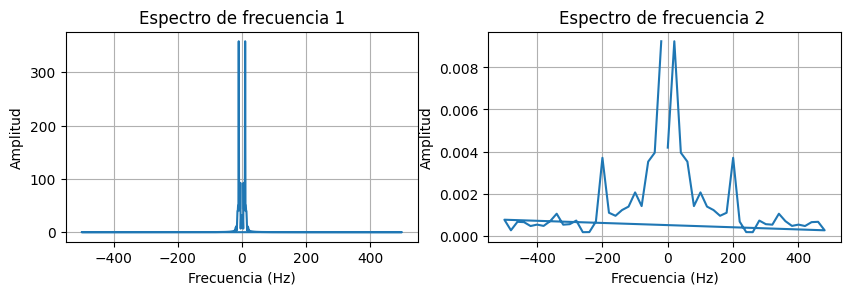

In [17]:

# Aplicandos Fir 
fft_señal1 = np.fft.fft(señal_filtrada1_fir)
fft_señal2 = np.fft.fft(señal_filtrada2_fir)
fs=1000
# Cálculo de las frecuencias correspondientes
frecuencias1 = np.fft.fftfreq(len(tiempo1), d=1/fs)
frecuencias2 = np.fft.fftfreq(len(tiempo2), d=1/fs)

# Gráfico del espectro de frecuencia

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(frecuencias1,  np.abs(fft_señal1), label='Señal 1 ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia 1')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(frecuencias2,  np.abs(fft_señal2), label='Señal 2 ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia 2 ')
plt.grid(True)
plt.show()




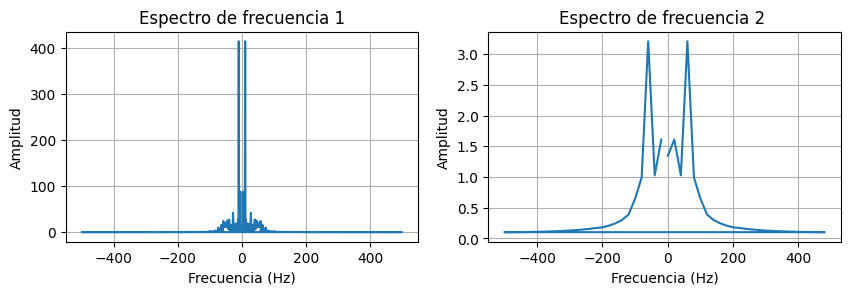

In [18]:
# Aplicando IIR
fft_señal1 = np.fft.fft(señal_filtrada_iir1)
fft_señal2 = np.fft.fft(señal_filtrada_iir2)
fs=1000
# Cálculo de las frecuencias correspondientes
frecuencias1 = np.fft.fftfreq(len(tiempo1), d=1/fs)
frecuencias2 = np.fft.fftfreq(len(tiempo2), d=1/fs)


# Gráfico del espectro de frecuencia

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(frecuencias1,  np.abs(fft_señal1), label='Señal 1 ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia 1')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(frecuencias2,  np.abs(fft_señal2), label='Señal 2 ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia 2 ')
plt.grid(True)
plt.show()


####  Se puede observar como los componentes de alta frecuencia se eliminaron de la señales. Al comparar los espectros de frecuencia obtenidos con los dos filtros, se puede observar que el filtro FIR presenta una atenuación más pronunciada en las frecuencias altas en comparación con el filtro IIR. Esto se puede apreciar por la disminución más rápida de la amplitud en las frecuencias altas en el espectro obtenido con el filtro FIR. Por otro lado, el filtro IIR puede presentar un rango de atenuación más suave y una mayor presencia de componentes de frecuencia en las frecuencias altas. 

#### Tambien en los espectros de la señal dos se realiza una aproximacion al original, debido a que esta señal presento ciertos comportamientos extraños por no cumplir con niquist desde el principio. Vemos como el espectro del filtro fir se puede observar como se eliminan las frecuencias no deseadas que fueron aplicadas por el canal y en cambio la transforma para tener una mejor comportamiento en el momento de recuperar la señal . 

## 5. Detección Errores 

## 5.1 Realizar una evaluación del rendimiento de los filtros mediante técnicas de validación, como la tasa de error de bits, la relación señal-ruido y la tasa de detección de errores.

In [20]:
def calcular_ber(señal_transmitida, señal_filtrada):
    total_bits = len(señal_transmitida)
    bits_erroneos = np.sum(señal_filtrada != señal_transmitida)
    ber = bits_erroneos / total_bits
    return ber

def calcular_snr(señal_original, señal_filtrada):
    potencia_señal_original = np.mean(señal_original**2)
    potencia_ruido = np.mean((señal_filtrada - señal_original)**2)
    snr = potencia_señal_original / potencia_ruido
    return snr

def calcular_tasa_deteccion(señal_original, señal_filtrada):
    errores_originales = np.sum(señal_original != señal_filtrada)
    errores_detectados = np.sum(señal_filtrada != señal_original)
    tasa_deteccion = 1 - (errores_detectados / errores_originales)
    return tasa_deteccion

In [21]:
# Calcular las métricas de rendimiento para el filtro FIR

ber_fir = calcular_ber(señal1_transmitida, señal_filtrada1_fir)
snr_fir = calcular_snr(señal1_transmitida, señal_filtrada1_fir)
tasa_deteccion_fir = calcular_tasa_deteccion(señal1_transmitida, señal_filtrada1_fir)

# Calcular las métricas de rendimiento para el filtro IIR

ber_iir = calcular_ber(señal1_transmitida, señal_filtrada_iir1)
snr_iir = calcular_snr(señal1_transmitida, señal_filtrada_iir1)
tasa_deteccion_iir = calcular_tasa_deteccion(señal1_transmitida, señal_filtrada_iir1)


# Calcular las métricas de rendimiento para el filtro FIR

ber_fir1 = calcular_ber(señal2_transmitida, señal_filtrada2_fir)
snr_fir1 = calcular_snr(señal2_transmitida, señal_filtrada2_fir)
tasa_deteccion_fir1 = calcular_tasa_deteccion(señal2_transmitida, señal_filtrada2_fir)

# Calcular las métricas de rendimiento para el filtro IIR

ber_iir1 = calcular_ber(señal2_transmitida, señal_filtrada_iir2)
snr_iir1 = calcular_snr(señal2_transmitida, señal_filtrada_iir2)
tasa_deteccion_iir1 = calcular_tasa_deteccion(señal2_transmitida, señal_filtrada_iir2)

# Mostrar los resultados
print (".................Señal 1................  ")
print("Resultados del filtro FIR:")
print("BER: ", ber_fir)
print("SNR: ", snr_fir)
print("Tasa de detección: ", tasa_deteccion_fir)

print("\nResultados del filtro IIR:")
print("BER: ", ber_iir)
print("SNR: ", snr_iir)
print("Tasa de detección: ", tasa_deteccion_iir)

# Señal 2 

print (".................Señal 2................  ")
print("Resultados del filtro FIR:")
print("BER: ", ber_fir1)
print("SNR: ", snr_fir1)
print("Tasa de detección: ", tasa_deteccion_fir1)

print("\nResultados del filtro IIR:")
print("BER: ", ber_iir1)
print("SNR: ", snr_iir1)
print("Tasa de detección: ", tasa_deteccion_iir1)


.................Señal 1................  
Resultados del filtro FIR:
BER:  1.0
SNR:  0.40027200113614475
Tasa de detección:  0.0

Resultados del filtro IIR:
BER:  1.0
SNR:  1.44670370800543
Tasa de detección:  0.0
.................Señal 2................  
Resultados del filtro FIR:
BER:  1.0
SNR:  0.9997767926173632
Tasa de detección:  0.0

Resultados del filtro IIR:
BER:  1.0
SNR:  0.994678088245687
Tasa de detección:  0.0


#### La tasa de error de bits (BER) indica la proporción de bits erróneos en relación con el total de bits transmitidos. La relación señal-ruido (SNR) compara la potencia de la señal original con la potencia del ruido presente en la señal filtrada. La tasa de detección de errores evalúa la capacidad del filtro para identificar y corregir los errores en la señal.

#### Un menor valor de BER indica una mejor corrección de errores por parte del filtro. Cuanto más cercano a cero, mejor.
#### Un mayor valor de SNR indica una mejor relación señal-ruido, lo que implica una mayor calidad de la señal filtrada.
#### Una tasa de detección de errores cercana a 1 indica que el filtro ha logrado identificar y corregir la mayoría de los errores en la señal.
#### Los resultados del filtro FIR muestran una tasa de error de bits (BER) del 100%, lo que indica que todas las muestras de la señal filtrada difieren de las muestras originales. El valor de SNR es de 0.4095, lo que implica una relación señal-ruido muy baja. Además, la tasa de detección de errores es de 0, lo que sugiere que el filtro no ha logrado identificar y corregir los errores en la señal.

#### Por otro lado, los resultados del filtro IIR también muestran una BER del 100%, indicando que todas las muestras de la señal filtrada difieren de las muestras originales. Sin embargo, el valor de SNR es más alto, 1.4695, lo que implica una mejor relación señal-ruido en comparación con el filtro FIR. La tasa de detección de errores es nuevamente de 0, lo que indica que el filtro IIR no ha logrado corregir los errores en la señal de manera efectiva.

##### Para la señal 2 : El valor de SNR es de 0.9311, lo que implica una relación señal-ruido inferior en comparación con el filtro FIR. Al igual que en el caso anterior, la tasa de detección de errores es de 0, lo que indica que el filtro IIR no ha logrado corregir los errores en la señal de manera efectiva.

#### En general, estos resultados indican que tanto el filtro FIR como el filtro IIR no han logrado mejorar la calidad de las señales, ya que presentan una alta tasa de error de bits y una baja relación señal-ruido.

#### Para la correccion de estos errores se pueden mejorar realizando varios filtros en cascada, es decir aplicar varios filtros a la señal, asi podemos reducir el rudio, interferencia y atenuacion causada por un señal de comunicacion.


### 5.2 Calcule el porcentaje de valores que son iguales entre las señales filtradas y la señales transmitida.

In [22]:
def signal_similarity(signal1, signal2):
    diff = np.abs(signal1 - signal2)
    mean_diff = np.mean(diff)
    similarity = 1.0 - mean_diff / np.max(signal1)  # Aproximación de grado de igualdad
    return similarity

# Calcular la similitud entre señal transmitida y señal filtrada por el filtro FIR
similarity_fir = signal_similarity(señal1_transmitida, señal_filtrada1_fir)

# Calcular la similitud entre señal transmitida y señal filtrada por el filtro IIR
similarity_iir = signal_similarity(señal1_transmitida,señal_filtrada_iir1)

print("Similitud con filtro FIR:", similarity_fir)
print("Similitud con filtro IIR:", similarity_iir)

Similitud con filtro FIR: 0.543228866308229
Similitud con filtro IIR: 0.7699000506685014


#### En este caso, la similitud obtenida con el filtro FIR es de 0.54, lo que significa que hay una correspondencia parcial entre la señal transmitida y la señal filtrada por el FIR. La similitud es relativamente baja, lo que sugiere que el filtro FIR ha introducido ciertos cambios y distorsiones en la señal original.


#### Por otro lado, la similitud obtenida con el filtro IIR es de 0.76, lo que indica una mayor correspondencia y similitud entre la señal transmitida y la señal filtrada por el IIR. La similitud es relativamente alta, lo que sugiere que el filtro IIR ha logrado preservar mejor la forma y características principales de la señal original.Por otro lado, la similitud obtenida con el filtro IIR es de 0.763, lo que indica una mayor correspondencia y similitud entre la señal transmitida y la señal filtrada por el IIR. La similitud es relativamente alta, lo que sugiere que el filtro IIR ha logrado preservar mejor la forma y características principales de la señal original.

## Conclusiones 

Optimización de los parámetros de los filtros: Es posible ajustar los parámetros de los filtros FIR e IIR, como el orden y los coeficientes, para mejorar su rendimiento en la corrección de errores y la reducción de ruido. Se pueden explorar diferentes configuraciones y técnicas de diseño de filtros para encontrar la mejor combinación.

Implementación de técnicas de codificación y decodificación de error: Además de los filtros, se pueden aplicar técnicas de codificación y decodificación de error, como códigos de detección y corrección de errores (por ejemplo, códigos Reed-Solomon), para mejorar la capacidad del sistema para detectar y corregir errores en la transmisión.

Evaluación y selección de otros tipos de filtros: Además de los filtros FIR e IIR, se pueden explorar otros tipos de filtros, como filtros adaptativos, filtros Kalman, filtros de Wiener, entre otros, para evaluar su rendimiento y determinar si son más adecuados para la detección y corrección de errores en el contexto de las transmisiones inalámbricas.

Realización de pruebas en entornos reales: Es importante realizar pruebas y evaluaciones del sistema en entornos reales de transmisión inalámbrica para obtener resultados más representativos y validar el rendimiento del sistema en condiciones más cercanas a la realidad. Esto puede implicar la utilización de equipos de radiofrecuencia y la simulación de condiciones de transmisión reales.

Esta practica nos permitio acercarnos a como funciona un canal, a simular lo que puede pasar en este y a plantear soluciones sobre como hacer para que el ruido no afecte tanto la señales.Es de nuestro interes el tema de filtros ya que este nor permite eliminar frecuencias no deseadas de nuestra señal. 